In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 50

In [2]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
train_X = train_X.reshape([n_samples, 1])
train_Y = train_Y.reshape([n_samples, 1])

In [3]:
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])
print X.shape
W = tf.Variable(numpy.ones((1,1), numpy.float32))
b = tf.Variable(numpy.ones((1,1), numpy.float32))
print W.shape
pred = tf.add(tf.matmul(X, W), b)
print pred.shape

(?, 1)
(1, 1)
(?, 1)


In [4]:
# cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*n_samples)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [7]:
sess = tf.Session()
sess.run(init)
sess.run(X, {X:train_X})
sess.run(W)
sess.run(pred, {X: train_X}).shape

print sess.run(cost, {X: train_X, Y: train_Y})

sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

print sess.run(cost, {X: train_X, Y: train_Y})
# print train_Y

13.4352
12.2559


Epoch: 0050 cost= 0.221725911 W= [[ 0.31764624]] b= [[ 0.90308499]]
Epoch: 0100 cost= 0.078972474 W= [[ 0.24668737]] b= [[ 0.89249307]]
Epoch: 0150 cost= 0.077464283 W= [[ 0.23937158]] b= [[ 0.89088982]]
Epoch: 0200 cost= 0.077446386 W= [[ 0.23868009]] b= [[ 0.89022589]]
Epoch: 0250 cost= 0.077440500 W= [[ 0.23867764]] b= [[ 0.88966125]]
Epoch: 0300 cost= 0.077434421 W= [[ 0.2387466]] b= [[ 0.88911247]]
Epoch: 0350 cost= 0.077428371 W= [[ 0.23882242]] b= [[ 0.88856864]]
Epoch: 0400 cost= 0.077422336 W= [[ 0.23889871]] b= [[ 0.88802344]]
Epoch: 0450 cost= 0.077416375 W= [[ 0.23897494]] b= [[ 0.88748288]]
Epoch: 0500 cost= 0.077410489 W= [[ 0.23905075]] b= [[ 0.88694447]]
Epoch: 0550 cost= 0.077404737 W= [[ 0.23912556]] b= [[ 0.88641614]]
Epoch: 0600 cost= 0.077399097 W= [[ 0.23919916]] b= [[ 0.88589573]]
Epoch: 0650 cost= 0.077393495 W= [[ 0.23927262]] b= [[ 0.88537407]]
Epoch: 0700 cost= 0.077387869 W= [[ 0.23934601]] b= [[ 0.88484895]]
Epoch: 0750 cost= 0.077382326 W= [[ 0.23941949]] 

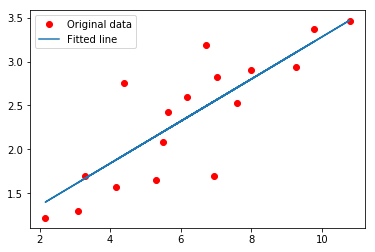

In [8]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for i in range(train_X.shape[0]):
#             print train_X[i], train_Y[0][i]
            sess.run(optimizer, feed_dict={X: train_X[i].reshape(1,1), Y: train_Y[i][0].reshape(1,1)})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X[:, 0], train_Y[:,0], 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [88]:
for (x, y) in zip(train_X, train_Y):
    print x, y

[ 3.3] [ 1.7    2.76   2.09   3.19   1.694  1.573  3.366  2.596  2.53   1.221
  2.827  3.465  1.65   2.904  2.42   2.94   1.3  ]


In [9]:
a = tf.ones([1, 1])
b = tf.zeros([1,10])
c = a-b 
print c.shape

(1, 10)


In [10]:
d = tf.reduce_sum(c)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(c)

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]], dtype=float32)